In [4]:
import numpy as np
import math
from scipy.integrate import quad
import statistics
from scipy import integrate
import random

######################            UCI data           ##################
data = np.genfromtxt(r'C:\Users\Kook\Desktop\SVM_Uncertain_2\data\ionosphere.dat',
                      skip_header=38,
                      skip_footer=0,
                      names=None,
                      dtype=float,
                      delimiter=',')

x = data[:, :-1]
t = data[:, -1]
#t[t == 1] = -1

import numpy as np
import pandas as pd
import time
import os

'''
                            nosie corrupted [OPTIONAL]
'''
import noiseADD as na
#x = na.withnoise(x, r=0.05)
#x = na.withnoise(x, r=0.1)



from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)





from s_SVM_Hingeloss import SVM_Hinge_sgd_2
from s_SVM_insensitive import SVM_Insensitive_BFGS_2
from s_SVM_generalized_pinball import SVM_GP_sgd_2

from t_SVM_Hingeloss import SVM_Hinge_sgd_3

from RBF_s_SVM_Hingeloss import RBF_SVM_Hinge_sgd_2
from RBF_s_SVM_generalized_pinball import RBF_SVM_GP_sgd_2
from RBF_s_SVM_insensitive import RBF_SVM_Insensitive_BFGS_2

'''
                            10-fold cross validation
'''
from sklearn.model_selection import KFold
n_folds = 10
cv = KFold(n_splits=n_folds, shuffle=True, random_state=58310798)

acc_train = np.empty((n_folds))
acc_test = np.empty((n_folds))
processingtime = np.empty((n_folds))
conf_M_train = np.empty((n_folds,2,2))
conf_M_test = np.empty((n_folds,2,2))
print('#'*75)
      



df_obj_hinge = pd.DataFrame(columns=["fold1", "fold2","fold3","fold4","fold5","fold6", "fold7","fold8","fold9","fold10"])
df_time_hinge = pd.DataFrame(columns=["fold1", "fold2","fold3","fold4","fold5","fold6", "fold7","fold8","fold9","fold10"])

x

###########################################################################


array([[ 0.34843328,  0.71162791, -0.23450221, ..., -1.05526476,
        -0.31303491, -0.99960962],
       [ 0.34843328,  0.72168839, -0.52714686, ..., -0.11541594,
        -0.9319047 , -0.08229005],
       [ 0.34843328,  0.72168839, -1.12604752, ...,  1.95732119,
        -1.29019774,  2.10730259],
       ...,
       [ 0.34843328,  0.72168839, -0.13014831, ...,  0.20436665,
         1.2465936 ,  0.18499421],
       [ 0.34843328,  0.48828544,  0.73190568, ..., -0.4117998 ,
         0.40929918,  0.02890021],
       [ 0.34843328,  0.52249104,  0.8476024 , ...,  0.40520571,
         0.68328797,  1.14294099]])

In [5]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix


''' Testing Cross Validation '''
'''
                            Testing with SVM_Hingeloss
'''
print("Using SVM_Hingeloss")
#start Cross Validation
for i, (train, test) in enumerate(cv.split(x)):
    #choose model     
    model = SVM_Hinge_sgd_3(max_epochs = 100, n_batches = 64, C=0.125)
    #steamp time
    start = time.time()
    #modeling
    model.fit(x[train], t[train])
    #cpu time used
    processingtime[i] = time.time() - start
    
    #prediction
    y_train = model.predict(x[train])
    y_test = model.predict(x[test])
     
    #evaluation model
    acc_train[i]= accuracy_score(t[train], y_train)
    acc_test[i] = accuracy_score(t[test], y_test)
    conf_M_train[i] = confusion_matrix(t[train], y_train)
    conf_M_test[i] = confusion_matrix(t[test], y_test)

    # setup dataframe
    obj_func = model.obj_func
    this_column = df_obj_hinge.columns[i]
    df_obj_hinge[this_column] = obj_func

#display result
#df_itersgdh = pd.DataFrame(model.iter_batchsgd)
print('CPU time = %.4f and its S.D. = %.4f' % (np.mean(processingtime), np.std(processingtime)))
print("Training accuracy = %.4f and its S.D. = %.4f" % (np.mean(acc_train), np.std(acc_train)))
print('Training confusion matirx: \n', np.mean(conf_M_train, axis=0))
print("Test accuracy     = %.4f and its S.D. = %.4f" % (np.mean(acc_test), np.std(acc_test)))
print('Test confusion matirx: \n', np.mean(conf_M_test, axis=0))
print('#'*75)

Using SVM_Hingeloss
Epoch: 1 [235 303 206  19   9 122  92  39 228  67  72 295 172 281  91 198 296 301
 242  61 255  20  84 138 221  12  37 265 148  69 181 256  99  25 239 273
 199 124 145 275 263 271 156 175 241 132 106 215 223 287  14 190   2  87
  93  75 134  66  10 155  81 224 137  73  71 311 247 251  33  42  41 125
  51 254 202 166 200 205  83 222 276 218 272 170 114 260 105  26 196 285
 227 173 147 136 123  65 246 294  31 212 288  97 178 217  45 314 120 110
 277  90   3 231 184  43 130  24 174 209  95 168 262  79 302 279  32  80
 252 249 233 102  48  13  60   1  52 185 119 269 232  49 189  55 176  74
 153 157  96 204 112 126  11 208 150 305 286   4 188 216 191 140  28 194
 306 100 283  82 113  78 230 261 152 214  21 210 165  47   8  85 192  57
 127 268 278 234 162 193 264  77  38  56 266  89 108  40 250 135  18 183
 245 257  59 141 163 117 146 158 237  58 104 182 267   7  86 297 180   5
 115   0 109 128 282  76 240 226 164 121 177 111  30 313  54  29  22 129
 142 229 258 270 292  

In [6]:
#from algorithm import SGDGPinLoss, SGDHingeLoss, RESmoreauGPinLoss, nonlinearRESmoreauGPinLoss, nonlinearSGDGPinLoss

df_obj_BFGS = pd.DataFrame(columns=["fold1", "fold2","fold3","fold4","fold5","fold6", "fold7","fold8","fold9","fold10"])
df_time_BFGS = pd.DataFrame(columns=["fold1", "fold2","fold3","fold4","fold5","fold6", "fold7","fold8","fold9","fold10"])

'''
                            Testing with SVM_BFGS
'''

print("Using SVM_BFGS")
#start Cross Validation
for i, (train, test) in enumerate(cv.split(x)):
    #choose model     
    model = SVM_Insensitive_BFGS_2(max_epochs = 100, n_batches = 64, C=0.0625, tau =0.8, epsilon = 0.8 )

    #steamp time
    start = time.time()
    #modeling
    model.fit(x[train], t[train])
    #cpu time used
    processingtime[i] = time.time() - start
    
    #prediction
    y_train = model.predict(x[train])
    y_test = model.predict(x[test])
     
    #evaluation model
    acc_train[i]= accuracy_score(t[train], y_train)
    acc_test[i] = accuracy_score(t[test], y_test)
    conf_M_train[i] = confusion_matrix(t[train], y_train)
    conf_M_test[i] = confusion_matrix(t[test], y_test)

    # setup dataframe
    obj_func = model.obj_func
    this_column = df_obj_BFGS.columns[i]
    df_obj_BFGS[this_column] = obj_func

#display result
#df_itersgdh = pd.DataFrame(model.iter_batchsgd)
print('CPU time = %.4f and its S.D. = %.4f' % (np.mean(processingtime), np.std(processingtime)))
print("Training accuracy = %.4f and its S.D. = %.4f" % (np.mean(acc_train), np.std(acc_train)))
print('Training confusion matirx: \n', np.mean(conf_M_train, axis=0))
print("Test accuracy     = %.4f and its S.D. = %.4f" % (np.mean(acc_test), np.std(acc_test)))
print('Test confusion matirx: \n', np.mean(conf_M_test, axis=0))
print('#'*75)

Using SVM_BFGS
----k:  1
----k:  2
----k:  3
----k:  4
----k:  5
----k:  6
----k:  7
----k:  8
----k:  9
----k:  10
----k:  11
----k:  12
----k:  13
----k:  14
----k:  15
----k:  16
----k:  17
----k:  18
----k:  19
----k:  20
----k:  21
----k:  22
----k:  23
----k:  24
----k:  25
----k:  26
----k:  27
----k:  28
----k:  29
----k:  30
----k:  31
----k:  32
----k:  33
----k:  34
----k:  35
----k:  36
----k:  37
----k:  38
----k:  39
----k:  40
----k:  41
----k:  42
----k:  43
----k:  44
----k:  45
----k:  46
----k:  47
----k:  48
----k:  49
----k:  50
----k:  51
----k:  52
----k:  53
----k:  54
----k:  55
----k:  56
----k:  57
----k:  58
----k:  59
----k:  60
----k:  61
----k:  62
----k:  63
----k:  64
----k:  65
----k:  66
----k:  67
----k:  68
----k:  69
----k:  70
----k:  71
----k:  72
----k:  73
----k:  74
----k:  75
----k:  76
----k:  77
----k:  78
----k:  79
----k:  80
----k:  81
----k:  82
----k:  83
----k:  84
----k:  85
----k:  86
----k:  87
----k:  88
----k:  89
----k:  90
----

In [7]:
df_obj_GP = pd.DataFrame(columns=["fold1", "fold2","fold3","fold4","fold5","fold6", "fold7","fold8","fold9","fold10"])
df_time_GP = pd.DataFrame(columns=["fold1", "fold2","fold3","fold4","fold5","fold6", "fold7","fold8","fold9","fold10"])


'''
                            Testing with SVM_GP
'''

print("Using SVM_GP")
#start Cross Validation
for i, (train, test) in enumerate(cv.split(x)):
    #choose model     
    model = SVM_GP_sgd_2(C = 2, max_epochs = 100 , n_batches = 64, tau_1 = 0.8, tau_2 = 0.8, epsilon_1 = 1, epsilon_2 = 1)

    #steamp time
    start = time.time()
    #modeling
    model.fit(x[train], t[train])
    #cpu time used
    processingtime[i] = time.time() - start
    
    #prediction
    y_train = model.predict(x[train])
    y_test = model.predict(x[test])
     
    #evaluation model
    acc_train[i]= accuracy_score(t[train], y_train)
    acc_test[i] = accuracy_score(t[test], y_test)
    conf_M_train[i] = confusion_matrix(t[train], y_train)
    conf_M_test[i] = confusion_matrix(t[test], y_test)

    # setup dataframe
    obj_func = model.obj_func
    this_column = df_obj_GP.columns[i]
    df_obj_GP[this_column] = obj_func

#df_itersgdG = pd.DataFrame(model.iter_sgdG)

#display result
print('CPU time = %.4f and its S.D. = %.4f' % (np.mean(processingtime), np.std(processingtime)))
print("Training accuracy = %.4f and its S.D. = %.4f" % (np.mean(acc_train), np.std(acc_train)))
print('Training confusion matirx: \n', np.mean(conf_M_train, axis=0))
print("Test accuracy     = %.4f and its S.D. = %.4f" % (np.mean(acc_test), np.std(acc_test)))
print('Test confusion matirx: \n', np.mean(conf_M_test, axis=0))
print('#'*75)


Using SVM_GP
Epoch: 1 [168  58 287 314 143 157  12 243 108 104 308 103 161 177 249 121 298 156
 209  86 163  54 146 166  41  42  47 313  61  37 184  95  38  40  88 229
  60  24  14  27  66 225 297  64   8 175 174  83 284 181 274 199  28  84
 144 258  18 202  32 256 227  45 292 283 159  15  19   6 306 167 278 253
 130  56 255  71 222 252 212 279 126  89 237 150 216 280 111  91 290 198
  43 307 228 133 210 247  69 244 271 116  70 203 183 142  97 170 310 259
 139  11 304 257 120  48  81 273 265  20 114 309 162  63 272 295  53 189
  67 238 311 300  46  92 155 134 289 113 191 261 153 234  85 187 179  78
 180   2 141  51   9 286 185 205 176 294  99 276 224 219  29 211 101 231
 270 215 186 178 206 201   1  93 226  74 285 281  49   4 291 106 169 192
 246  34 182  16 190 268 220  62  22  21 207   5 213  55  87 100  90 118
   0 138 140 105 129  57 149 312  50  26 132 147 119 188 299 148 223  76
 117 233 214 197 230  98 152  59 196  33 151 260  36 193 251  96   3 269
  30  13 172 165 264 232 248 

In [8]:
df_obj_hinge['mean'] = df_obj_hinge.iloc[:,1:10].mean(axis=1)
df_obj_BFGS['mean'] = df_obj_BFGS.iloc[:,1:10].mean(axis=1)
df_obj_GP['mean'] = df_obj_GP.iloc[:,1:10].mean(axis=1)
#df_objsgdG,df_objsgdh,df_objres
df_obj_hinge

fold1     fold2     fold3     fold4     fold5     fold6     fold7  \
0    5.053071  4.882733  5.141804  5.003259  4.930923  5.140028  4.988596   
1    2.806953  3.029073  3.498175  3.225263  3.030946  3.294544  3.164524   
2    2.296679  2.541872  2.722343  2.554502  2.418078  2.704682  2.506624   
3    2.108438  2.137501  2.316750  2.210922  2.180870  2.291074  2.102099   
4    1.948892  1.932804  2.052952  1.997286  1.992234  2.062984  1.916882   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.527285  0.507705  0.530649  0.495358  0.544963  0.528865  0.499155   
496  0.527056  0.507563  0.530497  0.495208  0.544751  0.528677  0.498929   
497  0.526793  0.507233  0.530196  0.495114  0.544555  0.528470  0.498786   
498  0.526714  0.507072  0.530094  0.494864  0.544353  0.528266  0.498571   
499  0.526591  0.506847  0.529868  0.494689  0.544248  0.528148  0.498313   

        fold8     fold9    fold10      mean  
0    5.024401  4.898890  5.086131  5.010752  
1    2.951534  2.926354  3.310745  3.159017  
2    2.450748  2.379863  2.647647  2.547373  
3    2.170116  2.084281  2.241009  2.192736  
4    2.029851  1.917135  2.045174  1.994145  
..        ...       ...       ...       ...  
495  0.527872  0.523185  0.514814  0.519174  
496  0.527774  0.522951  0.514696  0.519005  
497  0.527538  0.522790  0.514373  0.518784  
498  0.527536  0.522634  0.514186  0.518620  
499  0.527227  0.522319  0.514100  0.518418  

[500 rows x 11 columns]

In [9]:
df_obj_BFGS

fold1      fold2      fold3      fold4      fold5      fold6  \
0   17.514376  17.505918  17.507610  17.501835  17.501560  17.514936   
1    0.034291   0.034229   0.033837   0.033974   0.034210   0.033800   
2    0.013288   0.013241   0.013223   0.013324   0.013253   0.013088   
3    0.011382   0.011028   0.303989   0.016332   0.011164   0.011282   
4    0.010500   0.010181   0.177184   0.013454   0.010321   0.010446   
..        ...        ...        ...        ...        ...        ...   
95   0.009658   0.009502   0.011373   0.009644   0.009594   0.009651   
96   0.009658   0.009502   0.011363   0.009643   0.009594   0.009651   
97   0.009658   0.009502   0.011353   0.009643   0.009594   0.009651   
98   0.009658   0.009502   0.011343   0.009643   0.009594   0.009651   
99   0.009658   0.009502   0.011333   0.009643   0.009594   0.009651   

        fold7      fold8      fold9     fold10       mean  
0   17.515423  17.497139  17.508604  17.505473  17.506500  
1    0.034890   0.033149   0.034221   0.032772   0.033898  
2    0.013331   0.013326   0.013299   0.013110   0.013244  
3    0.011237   0.011219   0.011088   0.016782   0.044903  
4    0.010204   0.010450   0.010224   0.013729   0.029577  
..        ...        ...        ...        ...        ...  
95   0.009443   0.009755   0.009568   0.009714   0.009805  
96   0.009443   0.009755   0.009568   0.009713   0.009804  
97   0.009443   0.009755   0.009568   0.009713   0.009803  
98   0.009443   0.009755   0.009568   0.009713   0.009801  
99   0.009443   0.009755   0.009568   0.009713   0.009800  

[100 rows x 11 columns]

In [10]:
df_obj_GP

fold1      fold2      fold3      fold4      fold5      fold6  \
0    31.903588  31.703105  31.654443  31.522594  31.542833  31.883617   
1    24.615555  23.309513  22.105510  24.342151  20.911023  22.325550   
2     0.515330   1.224483   1.518389   1.544298   0.780161   1.617963   
3     0.244929   0.124100   0.266321   0.280724   0.372776   0.258274   
4     0.062887   0.052342   0.089634   0.240244   0.406010   0.333196   
..         ...        ...        ...        ...        ...        ...   
495   0.000003   0.000002   0.000003   0.000003   0.000004   0.000007   
496   0.000003   0.000002   0.000003   0.000003   0.000004   0.000007   
497   0.000003   0.000002   0.000003   0.000003   0.000004   0.000007   
498   0.000003   0.000002   0.000003   0.000003   0.000004   0.000007   
499   0.000003   0.000002   0.000003   0.000003   0.000004   0.000007   

         fold7      fold8      fold9     fold10       mean  
0    31.961515  31.368965  31.777613  31.604456  31.668794  
1    19.475195  16.465456  23.105938  25.717880  21.973135  
2     1.269902   0.834876   1.237102   1.169217   1.244043  
3     1.090221   0.411629   0.367122   0.554942   0.414012  
4     0.512192   0.504318   0.231071   0.327547   0.299617  
..         ...        ...        ...        ...        ...  
495   0.000008   0.000007   0.000004   0.000006   0.000005  
496   0.000008   0.000007   0.000004   0.000006   0.000005  
497   0.000007   0.000007   0.000004   0.000006   0.000005  
498   0.000007   0.000007   0.000004   0.000006   0.000005  
499   0.000007   0.000007   0.000004   0.000006   0.000005  

[500 rows x 11 columns]

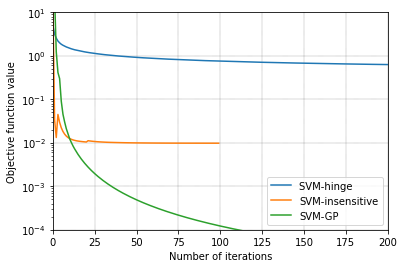

In [11]:
'''plot graph combine 3 algs'''

import os
import matplotlib.pyplot as plt


ac = plt.gca()


df_obj_hinge.plot(kind='line', y='mean',  
                  ax=ac)
df_obj_BFGS.plot(kind='line', y='mean',  
                   ax=ac)
df_obj_GP.plot(kind='line', y='mean',  
                   ax=ac)                  


plt.yscale("log")
#plt.xscale("log")
plt.xlabel('Number of iterations')
plt.ylabel('Objective function value')
#plt.legend(['(a)','(b)','(c)','(d)'],prop={'size':10})
plt.legend([r'SVM-hinge ',r'SVM-insensitive',r'SVM-GP'],prop={'size':10})
plt.grid(which='major', linestyle='--', linewidth='0.2', color='black')
#plt.ylim(1e-1, 1e3)
plt.ylim(0.0001, 10)
plt.xlim(0, 200)
#plt.figure(figsize=(10, 3))

#plt.savefig("/Users/dawraweemakmuang/Desktop/my_work2/pic/twonorm" +".pdf", format="PDF")  
plt.show()
